In [12]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
from sklearn.linear_model import RidgeCV,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [13]:
data=df=pd.read_csv("C:\\Users\\Yacou\\Desktop\\Yacouba_New\\climte\\Data\\Rendements\\okay\\sorgho.csv")

In [14]:
data

,provinces,year,Tmin_ERA5,ERA5_Pressure,ERA5_Tmax,ERA5_soil_moisture,ERA5_wins,ARC2_year,Best_Temp_Max,Best_Temp,...,NAO,NTA,PDO,gmsst,qbo,sahel_rainfal,tna,tsa,sorgho_b,sorgho_r
0,Bale,2003,295.584328,101230.9542,303.000166,0.391510,2.166261,1003.442320,32.618614,21.432137,...,-0.013333,0.020000,0.916667,0.736667,-13.300000,63.666667,0.093333,0.296667,1021.127660,1112.857143
1,Banwa,2003,295.431019,101233.7360,302.988727,0.342940,2.125180,1034.890135,32.335017,21.273757,...,-0.013333,0.020000,0.916667,0.736667,-13.300000,63.666667,0.093333,0.296667,1151.428571,1200.000000
2,Bale,2004,295.670144,101217.1807,303.432141,0.362601,2.198682,836.071675,32.983422,21.249552,...,0.250000,0.150000,0.496667,0.640000,11.726667,1.333333,0.300000,-0.153333,991.825622,537.710646
3,Kossi,2003,296.051885,101192.5439,304.064816,0.314432,2.105461,931.704089,32.671085,21.807773,...,-0.013333,0.020000,0.916667,0.736667,-13.300000,63.666667,0.093333,0.296667,1083.181818,1072.000000
4,Bale,2005,295.843265,101228.7215,303.463810,0.362435,2.395109,762.853984,33.115778,21.381346,...,-0.440000,0.726667,1.353333,0.810000,-14.106667,61.666667,0.913333,-0.010000,1197.731728,1299.509391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,Zondoma,2016,296.632578,101190.4650,305.163821,0.200586,2.307139,882.803056,33.657614,22.672844,...,-0.180000,0.296667,2.333333,1.206667,2.290000,64.666667,0.363333,0.473333,1220.941596,0.000000
671,Yatenga,2017,296.898290,101159.1897,305.863082,0.173094,2.463822,816.631204,34.291164,23.323867,...,0.123333,0.463333,0.930000,1.093333,6.236667,184.666667,0.550000,0.480000,876.456672,0.000000
672,Ziro,2017,295.759636,101246.8867,303.227227,0.316436,2.340768,879.972562,32.906914,21.650720,...,0.123333,0.463333,0.930000,1.093333,6.236667,184.666667,0.550000,0.480000,1099.775418,994.785113
673,Zoundweogo,2017,296.122954,101234.0524,303.601853,0.339022,2.379471,922.991941,32.932326,21.730105,...,0.123333,0.463333,0.930000,1.093333,6.236667,184.666667,0.550000,0.480000,1028.100880,1470.652386


In [15]:
col=data.columns
col

Index(['provinces', 'year', 'Tmin_ERA5', 'ERA5_Pressure', 'ERA5_Tmax',
       'ERA5_soil_moisture', 'ERA5_wins', 'ARC2_year', 'Best_Temp_Max',
       'Best_Temp', 'NDVI', 'Tamsat_Prec', 'chirps_Prec', 'CDD', 'CWD',
       'PRCPTOT', 'R10mm', 'R1mm', 'R20mm', 'R5mm', 'R95pTOT', 'R99pTOT',
       'RX1day', 'RX5day', 'SDII', 'TNn', 'TXn', 'TNx', 'TXx', 'Nino', 'AMM',
       'AMO', 'AO', 'EA', 'NAO', 'NTA', 'PDO', 'gmsst', 'qbo', 'sahel_rainfal',
       'tna', 'tsa', 'sorgho_b', 'sorgho_r'],
      dtype='object')

In [16]:
c0=['provinces']
c1=['year', 'Tmin_ERA5', 'ERA5_Pressure',
        'ERA5_wins', 'ARC2_year', 'Best_Temp_Max',
       'Best_Temp',  'Tamsat_Prec', 'chirps_Prec', 'CDD', 'CWD',
       'PRCPTOT', 'R10mm', 'R1mm', 'R20mm', 'R5mm', 'R95pTOT', 'R99pTOT',
       'RX1day', 'RX5day', 'SDII', 'TNn', 'TXn', 'TNx', 'TXx', 'Nino','sahel_rainfal','qbo' ]

c2=['NDVI','ERA5_soil_moisture','AMM',
       'AMO', 'AO', 'EA', 'NAO', 'NTA', 'PDO', 'gmsst',
       'tna', 'tsa']
d2=data[c2]
d3=data[ 'sorgho_b']
d4=data['sorgho_r']

In [17]:
d1=data[c1]
X = pd.DataFrame(StandardScaler().fit_transform(d1))
d1=X.rename(columns={0:'year', 1:'Tmin_ERA5', 2:'ERA5_Pressure',
        3:'ERA5_wins', 4:'ARC2_year', 5:'Best_Temp_Max',
       6:'Best_Temp', 7:'Tamsat_Prec', 8:'chirps_Prec', 9:'CDD', 10:'CWD',
       11:'PRCPTOT', 12:'R10mm', 13:'R1mm', 14:'R20mm', 15:'R5mm', 16:'R95pTOT', 17:'R99pTOT',
       18:'RX1day', 19:'RX5day', 20:'SDII', 21:'TNn', 22:'TXn', 23:'TNx', 24:'TXx', 25:'Nino',26:'sahel_rainfal',27:'qbo'})

In [18]:
dt=pd.concat([data[c0],d1,d2,d3,d4],axis=1)
dt

,provinces,year,Tmin_ERA5,ERA5_Pressure,ERA5_wins,ARC2_year,Best_Temp_Max,Best_Temp,Tamsat_Prec,chirps_Prec,...,AO,EA,NAO,NTA,PDO,gmsst,tna,tsa,sorgho_b,sorgho_r
0,Bale,-1.620185,-0.809319,0.694413,-0.855037,1.299718,-0.938507,-0.556599,0.403114,1.045235,...,0.245667,0.416667,-0.013333,0.020000,0.916667,0.736667,0.093333,0.296667,1021.127660,1112.857143
1,Banwa,-1.620185,-1.016662,0.741478,-0.995650,1.528163,-1.267631,-0.728230,0.288261,0.941182,...,0.245667,0.416667,-0.013333,0.020000,0.916667,0.736667,0.093333,0.296667,1151.428571,1200.000000
2,Bale,-1.388730,-0.693257,0.461382,-0.744068,0.083892,-0.515137,-0.754461,0.261979,-0.592442,...,-0.246333,0.240000,0.250000,0.150000,0.496667,0.640000,0.300000,-0.153333,991.825622,537.710646
3,Kossi,-1.620185,-0.176970,0.044557,-1.063146,0.778592,-0.877613,-0.149534,-0.306307,0.393767,...,0.245667,0.416667,-0.013333,0.020000,0.916667,0.736667,0.093333,0.296667,1083.181818,1072.000000
4,Bale,-1.157275,-0.459118,0.656638,-0.071737,-0.447982,-0.361534,-0.611640,0.775121,-0.121578,...,-0.397333,-0.320000,-0.440000,0.726667,1.353333,0.810000,0.913333,-0.010000,1197.731728,1299.509391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,Zondoma,1.388730,0.608388,0.009384,-0.372841,0.423361,0.267283,0.787915,-0.041794,-0.071168,...,-0.258333,-1.446667,-0.180000,0.296667,2.333333,1.206667,0.363333,0.473333,1220.941596,0.000000
671,Yatenga,1.620185,0.967751,-0.519756,0.163456,-0.057329,1.002537,1.493408,-1.164900,-0.666033,...,-0.139000,0.843333,0.123333,0.463333,0.930000,1.093333,0.550000,0.480000,876.456672,0.000000
672,Ziro,1.620185,-0.572223,0.963972,-0.257734,0.402800,-0.603927,-0.319729,0.076789,0.298587,...,-0.139000,0.843333,0.123333,0.463333,0.930000,1.093333,0.550000,0.480000,1099.775418,994.785113
673,Zoundweogo,1.620185,-0.080853,0.746831,-0.125264,0.715304,-0.574435,-0.233701,-0.075513,-0.085163,...,-0.139000,0.843333,0.123333,0.463333,0.930000,1.093333,0.550000,0.480000,1028.100880,1470.652386


In [19]:
drivers=['year','AMM','AMO', 'AO', 'EA', 'NAO', 'NTA', 'PDO', 'gmsst', 'qbo', 'tna', 'tsa','Nino','sahel_rainfal']

indices=['year', 'CDD', 'CWD','PRCPTOT', 'R10mm', 'R1mm', 'R20mm', 'R5mm', 'R95pTOT', 'R99pTOT',
       'RX1day', 'RX5day', 'SDII', 'TNn', 'TXn', 'TNx', 'TXx']

meteo= ['year', 'Tmin_ERA5', 'ERA5_Pressure',
        'ERA5_wins', 'ARC2_year', 'Best_Temp_Max','Best_Temp','Tamsat_Prec', 'chirps_Prec', 'NDVI','ERA5_soil_moisture' ]

ind_driver=['year', 'CDD', 'CWD','PRCPTOT', 'R10mm', 'R1mm', 'R20mm', 'R5mm', 'R95pTOT', 'R99pTOT',
       'RX1day', 'RX5day', 'SDII', 'TNn', 'TXn', 'TNx', 'TXx',
            'AMM','AMO', 'AO', 'EA', 'NAO', 'NTA', 'PDO', 'gmsst', 'qbo', 'tna', 'tsa','Nino','sahel_rainfal']

ind_meteo=['year', 'CDD', 'CWD','PRCPTOT', 'R10mm', 'R1mm', 'R20mm', 'R5mm', 'R95pTOT', 'R99pTOT',
       'RX1day', 'RX5day', 'SDII', 'TNn', 'TXn', 'TNx', 'TXx','Tmin_ERA5', 'ERA5_Pressure',
        'ERA5_wins', 'ARC2_year', 'Best_Temp_Max','Best_Temp','Tamsat_Prec', 'chirps_Prec', 'NDVI','ERA5_soil_moisture' ]

meteo_driver=['year', 'Tmin_ERA5', 'ERA5_Pressure','ERA5_wins', 'ARC2_year', 'Best_Temp_Max','Best_Temp','Tamsat_Prec',
              'chirps_Prec', 'NDVI','ERA5_soil_moisture', 
              'AMM','AMO', 'AO', 'EA', 'NAO', 'NTA', 'PDO', 'gmsst', 'qbo', 'tna', 'tsa','Nino','sahel_rainfal']

All=['year', 'Tmin_ERA5', 'ERA5_Pressure', 
       'ERA5_soil_moisture', 'ERA5_wins', 'ARC2_year', 'Best_Temp_Max',
       'Best_Temp', 'NDVI', 'Tamsat_Prec', 'chirps_Prec', 'CDD', 'CWD',
       'PRCPTOT', 'R10mm', 'R1mm', 'R20mm', 'R5mm', 'R95pTOT', 'R99pTOT',
       'RX1day', 'RX5day', 'SDII', 'TNn', 'TXn', 'TNx', 'TXx', 'Nino', 'AMM',
       'AMO', 'AO', 'EA', 'NAO', 'NTA', 'PDO', 'gmsst', 'qbo', 'sahel_rainfal',
       'tna', 'tsa']

c0=['provinces']

In [174]:
class model:
    
    def __init__(self,df,n,predicteur,var):
        self.df=df
        self.n=n
        self.predicteur=predicteur
        self.var=var
        self.model1=None
        self.model2=None
        self.model3=None
        self.model4=None
        self.X_train=None
        self.X_test=None
        self.y_train=None
        self.y_test =None
        pred=self.df[self.predicteur]
        y=self.df[self.var]
        dum = pd.get_dummies(self.df[c0],drop_first=True)
        X=pd.concat([dum,pred],axis=1)
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y,test_size=0.2,random_state=self.n) 
        self.X_train1, self.X_test1, self.y_train1, self.y_test1 = train_test_split(pred, y,test_size=0.2,random_state=self.n) 

        self.model1 = RidgeCV()
        self.model2 = Lasso(normalize=True, tol=1e-3)
        self.model3 = RandomForestRegressor(n_estimators = 100,max_depth=8)
        self.model4 = DecisionTreeRegressor(max_depth=3) 

        self.model1.fit(self.X_train, self.y_train)
        self.model2.fit(self.X_train, self.y_train)
        self.model3.fit(self.X_train, self.y_train)
        self.model4.fit(self.X_train, self.y_train)

    def prediction(self):
            train_RidgeCV=self.model1.score(self.X_train, self.y_train)
            test_RidgeCV=self.model1.score(self.X_test, self.y_test)

            train_LassoCV=self.model2.score(self.X_train, self.y_train)
            test_LassoCV=self.model2.score(self.X_test, self.y_test)

            train_RandomForest=self.model3.score(self.X_train, self.y_train)
            test_RandomForest=self.model3.score(self.X_test, self.y_test)
 
            train_DecisionTree=self.model4.score(self.X_train, self.y_train)
            test_DecisionTree=self.model4.score(self.X_test, self.y_test)


            data = {'model': ['RandomForest', 'DecisionTree', 'RidgeCV', 'Lasso'],
            'Score_train': [train_RandomForest, train_DecisionTree, train_RidgeCV, train_LassoCV],
            'score_test': [test_RandomForest, test_DecisionTree, test_RidgeCV, test_LassoCV]
              }
            d = pd.DataFrame(data)
            return d
        
    def plot(self):
        plt.figure(figsize= (20,5)) 
        plt.plot(self.model3.predict(self.X_test),'g', label='Predict')
        y_test=np.array(self.y_test)
        plt.plot(y_test,'r', label='real value')
        plt.legend()
        plt.show()

    
    def get_RF(self):
        feat_importances = pd.Series(abs(self.model3.feature_importances_), index=self.X_train.columns)
        feat_importances.nlargest(5).plot(kind='barh')
        
    def get_feature(self):
        feat_importances = pd.Series(abs(self.model3.feature_importances_), index=self.X_train.columns)
        aa=feat_importances.sort_values(ascending=False)
        return aa.index
        
    
    def get_RidgeCV(self):
        feat_importances = pd.Series(abs(self.model1.coef_), index=self.X_train.columns)
        feat_importances.nlargest(10).plot(kind='barh')
        
    def get_Lasso(self):
        return self.model2       

    def get_dec_tree(self):
        return self.model4



In [85]:
ind=['chirps_Prec', 'ERA5_Pressure', 
       'ERA5_soil_moisture', 'Best_Temp_Max', 'PRCPTOT']

In [176]:
m1=model(dt,1,ind,'sorgho_r')
print(m1.prediction())
print(len(ind))

          model  Score_train  score_test
0  RandomForest     0.769650    0.524128
1  DecisionTree     0.517647    0.360778
2       RidgeCV     0.592765    0.571324
3         Lasso     0.520223    0.547901
5


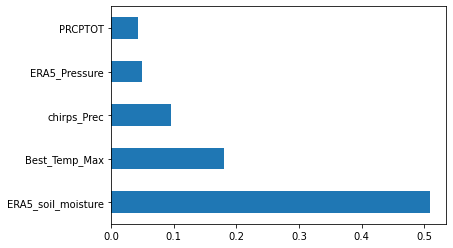

In [177]:
m1.get_RF()

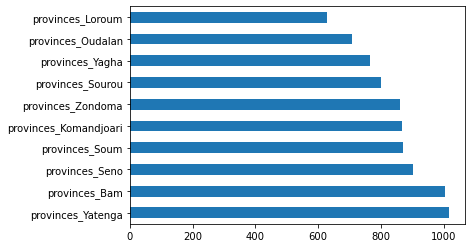

In [178]:
m1.get_RidgeCV()

In [41]:
t1=model(dt,1,meteo,'sorgho_b')
print(t1.prediction())


          model  Score_train  score_test
0  RandomForest     0.729613    0.385207
1  DecisionTree     0.305771    0.204223
2       RidgeCV     0.403657    0.271534
3         Lasso     0.268960    0.264716


In [169]:
meteo= ['year',  'ERA5_Pressure',
        'ERA5_wins', 'Best_Temp_Max','Best_Temp', 'chirps_Prec', 'ERA5_soil_moisture' ]

In [170]:
t2=model(dt,1,meteo,'sorgho_r')
print(t2.prediction())


          model  Score_train  score_test
0  RandomForest     0.807860    0.539650
1  DecisionTree     0.526776    0.413267
2       RidgeCV     0.606052    0.572395
3         Lasso     0.527401    0.542679


In [43]:
t3=model(dt,1,drivers,'sorgho_b')
print(t3.prediction())

          model  Score_train  score_test
0  RandomForest     0.487115    0.194100
1  DecisionTree     0.151722    0.015659
2       RidgeCV     0.426864    0.294573
3         Lasso     0.224753    0.178616


In [171]:
t4=model(dt,1,drivers,'sorgho_r')
print(t4.prediction())

          model  Score_train  score_test
0  RandomForest     0.473269    0.416035
1  DecisionTree     0.151636    0.139980
2       RidgeCV     0.627457    0.531394
3         Lasso     0.535779    0.530965


In [37]:
t5=model(dt,3,indices,'sorgho_b')
t5.prediction()

,model,Score_train,score_test
0,RandomForest,0.751344,0.226301
1,DecisionTree,0.345574,-0.012844
2,RidgeCV,0.361617,0.177661
3,Lasso,0.276733,0.221923


In [153]:
t6=model(dt,1,indices,'sorgho_r')
t6.prediction()

,model,Score_train,score_test
0,RandomForest,0.824383,0.544181
1,DecisionTree,0.502817,0.435268
2,RidgeCV,0.606203,0.531351
3,Lasso,0.528187,0.512898


In [51]:
t7=model(dt,1,ind_driver,'sorgho_b')
t7.prediction()

,model,Score_train,score_test
0,RandomForest,0.771078,0.336770
1,DecisionTree,0.285796,0.106585
2,RidgeCV,0.451326,0.309885
3,Lasso,0.282865,0.231449


In [53]:
t8=model(dt,3,ind_driver,'sorgho_r')
t8.prediction()

,model,Score_train,score_test
0,RandomForest,0.835963,0.441372
1,DecisionTree,0.554711,0.371684
2,RidgeCV,0.633661,0.544424
3,Lasso,0.541124,0.450892


In [18]:
model(dt,3,ind_meteo,'sorgho_b')

,model,Score_train,score_test
0,RandomForest,0.910606,0.276636
1,DecisionTree,1.000000,-1.098572
2,RidgeCV,0.455238,0.125952
3,Lasso,0.305446,0.227253


In [19]:
model(dt,3,ind_meteo,'sorgho_r')

,model,Score_train,score_test
0,RandomForest,0.932657,0.495120
1,DecisionTree,1.000000,-0.013782
2,RidgeCV,0.623357,0.519941
3,Lasso,0.541404,0.457041


In [20]:
model(dt,3,meteo_driver,'sorgho_b')

,model,Score_train,score_test
0,RandomForest,0.911080,0.300897
1,DecisionTree,1.000000,-0.314160
2,RidgeCV,0.465802,0.217428
3,Lasso,0.299349,0.220709


In [21]:
model(dt,3,meteo_driver,'sorgho_r')

,model,Score_train,score_test
0,RandomForest,0.932312,0.489593
1,DecisionTree,1.000000,0.195886
2,RidgeCV,0.630231,0.527205
3,Lasso,0.540353,0.458255


In [27]:
model(dt,3,All,'sorgho_r')

,model,Score_train,score_test
0,RandomForest,0.930753,0.473648
1,DecisionTree,1.000000,0.148789
2,RidgeCV,0.637233,0.536123
3,Lasso,0.541456,0.456940


In [26]:
model(dt,3,All,'sorgho_b')

,model,Score_train,score_test
0,RandomForest,0.916724,0.289741
1,DecisionTree,1.000000,-0.446954
2,RidgeCV,0.491830,0.158549
3,Lasso,0.307552,0.233731


### correlation between yield and variables

In [38]:
a=pd.DataFrame(pd.DataFrame(dt.corr()).iloc[:,40:42]) 
a

,sorgho_b,sorgho_r
year,-0.066324,0.025619
Tmin_ERA5,-0.377815,-0.521589
ERA5_Pressure,0.368850,0.518115
ERA5_wins,-0.296336,-0.429415
ARC2_year,0.342457,0.479348
Best_Temp_Max,-0.407814,-0.590203
Best_Temp,-0.404220,-0.594187
Tamsat_Prec,0.368139,0.576149
chirps_Prec,0.394962,0.564282
CDD,-0.098364,-0.118657


In [150]:
All_1=['ERA5_soil_moisture', 'TNx', 'Best_Temp', 'Best_Temp_Max',
       'Tamsat_Prec', 'TXx', 'TNn', 'Tmin_ERA5',
       'ERA5_Pressure', 'PRCPTOT', 'TXn', 'R10mm',
       'ERA5_wins', 'SDII', 'R5mm', 'R20mm', 'R1mm', 'RX1day', 'RX5day',
       'R95pTOT', 'CDD', 'CWD', 'NDVI', 'R99pTOT', 'EA', 'AMO', 'PDO', 'NAO',
       'sahel_rainfal', 'qbo']

In [151]:
len(All_1)

30

In [152]:
ty=model(dt,1,All_1,'sorgho_r')
ty.prediction()

,model,Score_train,score_test
0,RandomForest,0.831390,0.530954
1,DecisionTree,0.552317,0.213596
2,RidgeCV,0.615753,0.535058
3,Lasso,0.534989,0.527646


In [45]:
model(dt,3,All_1,'sorgho_b')

,model,Score_train,score_test
0,RandomForest,0.910141,0.266593
1,DecisionTree,1.000000,-0.883215
2,RidgeCV,0.448761,0.137020
3,Lasso,0.305444,0.227424
